In [1]:
#importação 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#importação do cvs
df= pd.read_csv('https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv', sep= ';', encoding='latin1')
df

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3
2,5,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,47,2,1,0,0,0,637,3
3,6,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,6,...,NaN,NaN,26,2,1,0,0,0,473,3
4,7,1,2003,2003m01,1,1,Rio de Janeiro,3304557,Capital,4,...,NaN,NaN,10,1,3,0,0,0,147,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36213,159,5,2025,2025m05,35,4,Cachoeiras de Macacu,3300803,Interior,1,...,3.0,0.0,24,1,0,0,0,0,150,2
36214,165,5,2025,2025m05,33,5,Mangaratiba,3302601,Interior,1,...,7.0,0.0,29,2,0,0,0,0,208,2
36215,166,5,2025,2025m05,33,5,Angra dos Reis,3300100,Interior,3,...,14.0,1.0,59,2,0,0,0,0,580,2
36216,167,5,2025,2025m05,43,5,Paraty,3303807,Interior,3,...,6.0,0.0,37,0,0,0,0,0,230,2


In [3]:
#filtro de municipio e ano
df_rj= df.loc[(df['munic'] == 'Rio de Janeiro') & (df['ano'] >= 2020)]
df_rj

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
27313,1,1,2020,2020m01,5,1,Rio de Janeiro,3304557,Capital,0,...,0.0,1.0,8,0,0,0,0,0,665,3
27314,4,1,2020,2020m01,5,1,Rio de Janeiro,3304557,Capital,1,...,15.0,13.0,10,3,0,0,0,0,600,3
27315,5,1,2020,2020m01,5,1,Rio de Janeiro,3304557,Capital,0,...,12.0,7.0,32,1,0,0,0,0,1193,3
27316,6,1,2020,2020m01,4,1,Rio de Janeiro,3304557,Capital,1,...,5.0,4.0,22,2,0,0,0,0,480,3
27317,7,1,2020,2020m01,5,1,Rio de Janeiro,3304557,Capital,0,...,1.0,1.0,10,0,0,0,0,0,161,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36117,40,5,2025,2025m05,9,2,Rio de Janeiro,3304557,Capital,2,...,1.0,0.0,30,3,0,0,0,0,584,2
36118,41,5,2025,2025m05,18,2,Rio de Janeiro,3304557,Capital,0,...,6.0,0.0,44,4,0,0,0,0,794,2
36119,42,5,2025,2025m05,31,2,Rio de Janeiro,3304557,Capital,6,...,15.0,4.0,65,9,0,0,0,0,1276,2
36120,43,5,2025,2025m05,27,2,Rio de Janeiro,3304557,Capital,4,...,2.0,0.0,113,8,1,0,0,0,626,2


In [4]:
#junção do ano, municipio e estelionato
df_rj = df_rj.groupby(['ano', 'cisp'])[['estelionato', 'registro_ocorrencias']].sum().reset_index()
df_rj= df_rj.sort_values(by= 'ano')
df_rj

,ano,cisp,estelionato,registro_ocorrencias
0,2020,1,1328,6428
1,2020,4,216,3858
2,2020,5,1050,9242
3,2020,6,365,4407
4,2020,7,54,1404
...,...,...,...,...
241,2025,40,441,2823
242,2025,41,878,3886
243,2025,42,1589,6931
244,2025,43,570,3382


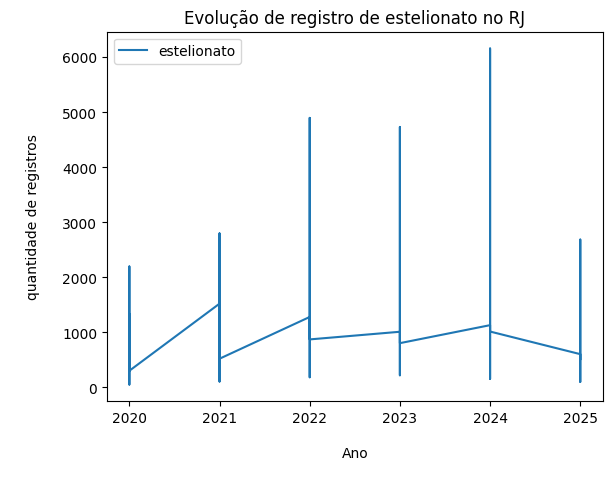

In [5]:
#grafico 
df_rj.plot(x='ano', y='estelionato',kind= 'line')
plt.title('Evolução de registro de estelionato no RJ')
plt.xlabel('\nAno\n')
plt.ylabel('\nquantidade de registros\n')
plt.show()

In [6]:
#array do estelionato
array= df_rj['estelionato']
dados= np.array(array)

In [7]:
media= np.mean(dados)
media

np.float64(1241.0691056910568)

In [8]:
mediana= np.median(dados)
mediana

np.float64(997.5)

In [9]:
distancia= (media - mediana) / mediana *100
distancia

np.float64(24.41795545775006)

In [10]:
#array de delegacia
delegacia= df_rj['cisp']
dados= np.array(delegacia)

In [15]:
q1= np.percentile(dados, 25)
q1

np.float64(14.0)

In [11]:
q3= np.percentile(dados, 75)
q3

np.float64(34.0)

In [12]:
#condição e criação de uma nova coluna (ano/cisp)
df_dele= df_rj.loc[(df_rj['estelionato'] >= q3)]
df_dele= df_dele.sort_values(by= 'estelionato')
df_dele['ano']= df_dele['ano'].astype(str)
df_dele['cisp']= df_dele['cisp'].astype(str)
df_dele['ano/cisp']= df_dele['ano'] + '/' + df_dele['cisp']
df_dele


,ano,cisp,estelionato,registro_ocorrencias,ano/cisp
4,2020,7,54,1404,2020/7
7,2020,11,84,688,2020/11
212,2025,11,102,467,2025/11
48,2021,11,109,805,2021/11
171,2024,11,158,1081,2024/11
...,...,...,...,...,...
135,2023,16,4735,22037,2023/16
94,2022,16,4900,22303,2022/16
176,2024,16,4930,24650,2024/16
192,2024,32,5468,25445,2024/32


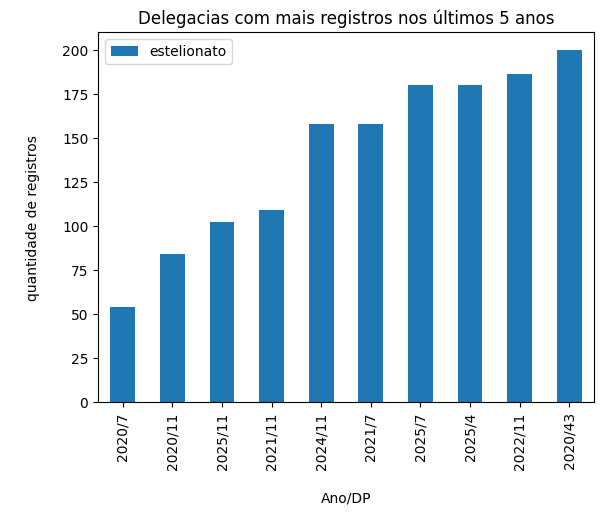

In [13]:
#grafico 
df_dele.head(10).plot(x='ano/cisp', y='estelionato',kind= 'bar')
plt.title('Delegacias com mais registros nos últimos 5 anos')
plt.xlabel('\nAno/DP\n')
plt.ylabel('\nquantidade de registros\n')
plt.show()

In [16]:
iqr= q3 - q1
iqr

np.float64(20.0)

In [17]:
ls= q3 + (1.5 * iqr)
ls

np.float64(64.0)

In [18]:
li= q1 - (1.5 * iqr)
li

np.float64(-16.0)

In [20]:
df_dele= df_rj.loc[(df_rj['estelionato'] >= ls)]
df_dele

,ano,cisp,estelionato,registro_ocorrencias
0,2020,1,1328,6428
1,2020,4,216,3858
2,2020,5,1050,9242
3,2020,6,365,4407
5,2020,9,1071,7642
...,...,...,...,...
241,2025,40,441,2823
242,2025,41,878,3886
243,2025,42,1589,6931
244,2025,43,570,3382
